<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n20.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.043339,59.143796,99.417336,2560.615638,2753.220109,1355.059249,1398.160860
1,0.0,1.0,39.314959,89.214002,33.835416,5773.942064,5946.306440,3845.190588,2101.115853
2,0.0,2.0,63.757693,89.298030,22.010720,-112.082524,72.983919,3438.101112,-3365.117193
3,0.0,3.0,45.877593,88.209911,47.273701,16494.611781,16685.972987,3252.730925,13433.242062
4,0.0,4.0,83.124282,71.173549,22.892690,5043.309042,5230.499563,2118.337441,3112.162122
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.130597,57.821196,75.351252,-77.084896,105.218150,259.037805,-153.819655
29996,999.0,26.0,34.481639,87.768645,38.188798,8180.919940,8351.359022,1538.893849,6812.465173
29997,999.0,27.0,24.835591,65.412770,21.045603,-5718.732738,-5597.438774,-832.863951,-4764.574823
29998,999.0,28.0,46.363453,49.118866,27.563765,84.480144,217.526227,-1447.141511,1664.667738


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.043339,59.143796,99.417336,2560.615638,2753.220109,1355.059249,1398.160860
1,0.0,1.0,39.314959,89.214002,33.835416,5773.942064,5946.306440,3845.190588,2101.115853
2,0.0,2.0,63.757693,89.298030,22.010720,-112.082524,72.983919,3438.101112,-3365.117193
3,0.0,3.0,45.877593,88.209911,47.273701,16494.611781,16685.972987,3252.730925,13433.242062
4,0.0,4.0,83.124282,71.173549,22.892690,5043.309042,5230.499563,2118.337441,3112.162122
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.130597,57.821196,75.351252,-77.084896,105.218150,259.037805,-153.819655
29996,999.0,26.0,34.481639,87.768645,38.188798,8180.919940,8351.359022,1538.893849,6812.465173
29997,999.0,27.0,24.835591,65.412770,21.045603,-5718.732738,-5597.438774,-832.863951,-4764.574823
29998,999.0,28.0,46.363453,49.118866,27.563765,84.480144,217.526227,-1447.141511,1664.667738


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    24.043339  59.143796  ...  1355.059249   1398.160860
      1.0    39.314959  89.214002  ...  3845.190588   2101.115853
      2.0    63.757693  89.298030  ...  3438.101112  -3365.117193
      3.0    45.877593  88.209911  ...  3252.730925  13433.242062
      4.0    83.124282  71.173549  ...  2118.337441   3112.162122
...                ...        ...  ...          ...           ...
999.0 25.0   39.130597  57.821196  ...   259.037805   -153.819655
      26.0   34.481639  87.768645  ...  1538.893849   6812.465173
      27.0   24.835591  65.412770  ...  -832.863951  -4764.574823
      28.0   46.363453  49.118866  ... -1447.141511   1664.667738
      29.0   42.837919  53.041451  ...  -703.018031   2938.180831

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    24.043339  59.143796  ...  1355.059249   1398.160860
      1.0    39.314959  89.214002  ...  3845.190588   2101.115853
      2.0    63.757693  89.298030  ...  3438.101112  -3365.117193
      3.0    45.877593  88.209911  ...  3252.730925  13433.242062
      4.0    83.124282  71.173549  ...  2118.337441   3112.162122
...                ...        ...  ...          ...           ...
999.0 25.0   39.130597  57.821196  ...   259.037805   -153.819655
      26.0   34.481639  87.768645  ...  1538.893849   6812.465173
      27.0   24.835591  65.412770  ...  -832.863951  -4764.574823
      28.0   46.363453  49.118866  ... -1447.141511   1664.667738
      29.0   42.837919  53.041451  ...  -703.018031   2938.180831

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.043339,59.143796,99.417336,2560.615638,2753.220109,1355.059249,1398.160860
1,0.0,1.0,39.314959,89.214002,33.835416,5773.942064,5946.306440,3845.190588,2101.115853
2,0.0,2.0,63.757693,89.298030,22.010720,-112.082524,72.983919,3438.101112,-3365.117193
3,0.0,3.0,45.877593,88.209911,47.273701,16494.611781,16685.972987,3252.730925,13433.242062
4,0.0,4.0,83.124282,71.173549,22.892690,5043.309042,5230.499563,2118.337441,3112.162122
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,39.130597,57.821196,75.351252,-77.084896,105.218150,259.037805,-153.819655
29996,999.0,26.0,34.481639,87.768645,38.188798,8180.919940,8351.359022,1538.893849,6812.465173
29997,999.0,27.0,24.835591,65.412770,21.045603,-5718.732738,-5597.438774,-832.863951,-4764.574823
29998,999.0,28.0,46.363453,49.118866,27.563765,84.480144,217.526227,-1447.141511,1664.667738


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    24.043339  59.143796  ...  1355.059249   1398.160860
      1.0    39.314959  89.214002  ...  3845.190588   2101.115853
      2.0    63.757693  89.298030  ...  3438.101112  -3365.117193
      3.0    45.877593  88.209911  ...  3252.730925  13433.242062
      4.0    83.124282  71.173549  ...  2118.337441   3112.162122
...                ...        ...  ...          ...           ...
999.0 25.0   39.130597  57.821196  ...   259.037805   -153.819655
      26.0   34.481639  87.768645  ...  1538.893849   6812.465173
      27.0   24.835591  65.412770  ...  -832.863951  -4764.574823
      28.0   46.363453  49.118866  ... -1447.141511   1664.667738
      29.0   42.837919  53.041451  ...  -703.018031   2938.180831

[30000 rows x 7 columns]

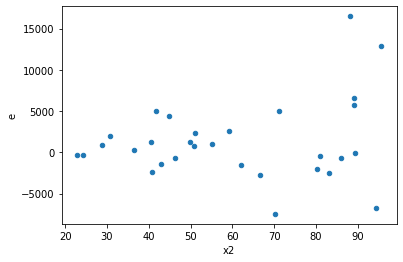

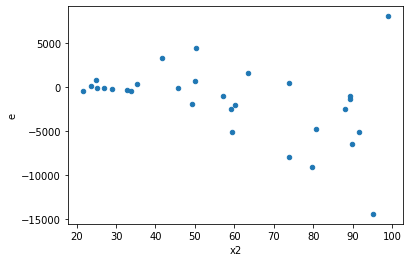

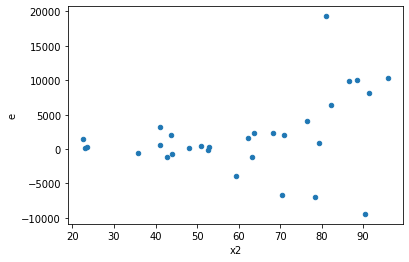

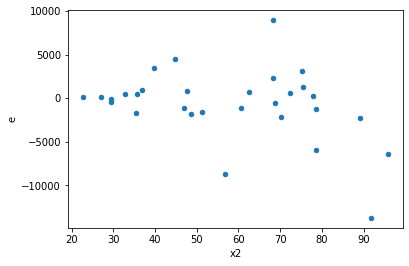

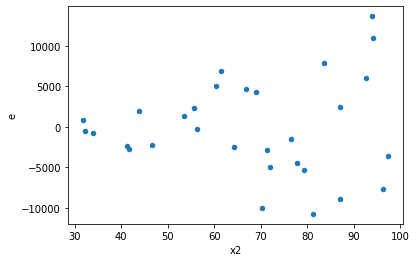

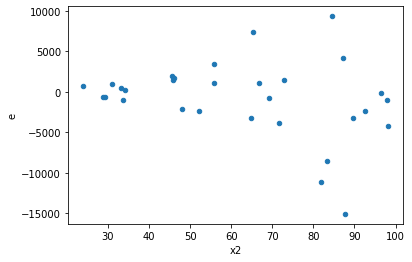

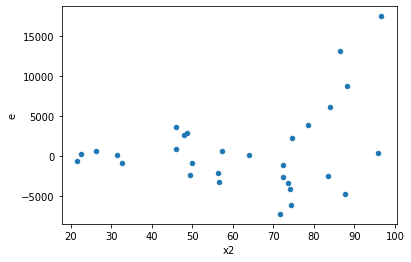

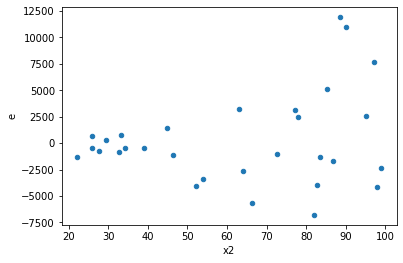

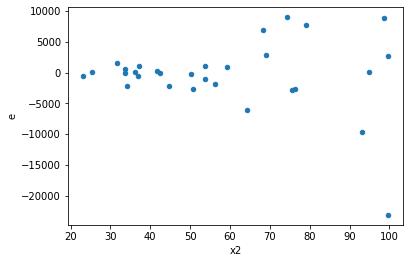

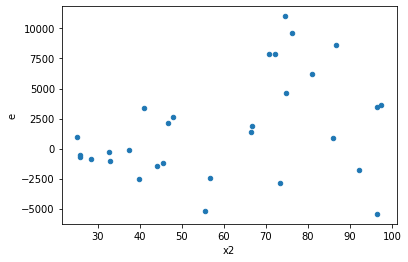

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,34650983.42557713,497811999.86949503,3850109.2695085695,55312444.42994389,14.366460938653828,0.0005006174037844868,0.9997496912981078,0.0002503087018922434,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,12453586.219929678,352936390.5525893,1383731.8022144088,39215154.50584325,28.340141090265178,2.9890506198393396e-05,0.9999850547469008,1.4945253099196698e-05,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,17018301.696603436,701170434.6852386,1890922.4107337152,77907826.07613762,41.200963949603754,6.002951987271743e-06,0.9999969985240064,3.0014759936358715e-06,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,19342370.41585504,113147222.41795924,2149152.2684283378,12571913.601995472,5.849708178745863,0.0147699448702856,0.9926150275648572,0.0073849724351428,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,55795449.71320109,595090159.777272,6199494.412577899,66121128.86414133,10.665567942119747,0.0016248473209730108,0.9991875763395135,0.0008124236604865054,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,19802956.375446927,448759958.0431067,2200328.4861607696,49862217.56034519,22.661260749910568,7.681947347548679e-05,0.9999615902632623,3.8409736737743394e-05,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,27691406.705844983,344471277.355634,3076822.967316109,38274586.37284822,12.439645302776347,0.0008894177156575367,0.9995552911421712,0.00044470885782876834,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,16545453.097680796,259955579.7497059,1838383.6775200884,28883953.305522878,15.711602348692663,0.0003486090061894931,0.9998256954969053,0.00017430450309474654,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,2038164.354287276,773165345.166575,226462.70603191957,85907260.57406388,379.3439638664186,3.2209368505675684e-10,0.9999999998389532,1.6104684252837842e-10,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,34650983.42557713,497811999.86949503,3850109.2695085695,55312444.42994389,14.366460938653828,0.0005006174037844868,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,12453586.219929678,352936390.5525893,1383731.8022144088,39215154.50584325,28.340141090265178,2.9890506198393396e-05,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,17018301.696603436,701170434.6852386,1890922.4107337152,77907826.07613762,41.200963949603754,6.002951987271743e-06,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,19342370.41585504,113147222.41795924,2149152.2684283378,12571913.601995472,5.849708178745863,0.0147699448702856,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,55795449.71320109,595090159.777272,6199494.412577899,66121128.86414133,10.665567942119747,0.0016248473209730108,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,19802956.375446927,448759958.0431067,2200328.4861607696,49862217.56034519,22.661260749910568,7.681947347548679e-05,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,27691406.705844983,344471277.355634,3076822.967316109,38274586.37284822,12.439645302776347,0.0008894177156575367,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,16545453.097680796,259955579.7497059,1838383.6775200884,28883953.305522878,15.711602348692663,0.0003486090061894931,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,2038164.354287276,773165345.166575,226462.70603191957,85907260.57406388,379.3439638664186,3.2209368505675684e-10,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    887
Reject001=1 : Homoscedasticity      113
Name: Result_test, dtype: int64